In [1]:
pwd

u'/Users/anshajgoel'

In [51]:
path="courses/deeplearning1/nbs/dogscats/"
#path="courses/deeplearning1/nbs/dogscats/sample/"

In [52]:
%matplotlib inline

In [53]:
from __future__ import division,print_function

import os,json
from glob import glob
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
from matplotlib import pyplot as plt

In [54]:
import utils; reload(utils)
from utils import plots

In [55]:
batch_size=64

In [56]:
import vgg16;reload(vgg16)
from vgg16 import Vgg16

In [ ]:
vgg= Vgg16()
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches,val_batches,nb_epoch=1)

/Users/anshajgoel/anaconda/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_4 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
11008/23000 [=============>................] - ETA: 12101s - loss: 0.1287 - acc: 0.9639

In [14]:
vgg = Vgg16()

/Users/anshajgoel/anaconda/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [15]:
batches = vgg.get_batches(path+'train', batch_size =4)

Found 160 images belonging to 2 classes.


In [16]:
imgs, labels = next(batches)

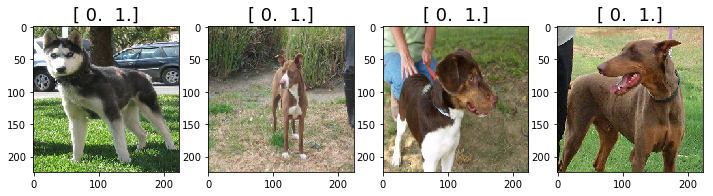

In [17]:
plots(imgs,titles=labels)

In [18]:
vgg.predict(imgs,True)

(array([ 0.4335,  0.5445,  0.461 ,  0.8319], dtype=float32),
 array([250, 253, 215, 236]),
 [u'Siberian_husky', u'basenji', u'Brittany_spaniel', u'Doberman'])

In [19]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

In [20]:
batch_size=64

In [21]:
batches = vgg.get_batches(path+'train', batch_size = batch_size)
val_batches = vgg.get_batches(path+'valid',batch_size = batch_size)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [22]:
vgg.finetune(batches)

In [23]:
vgg.fit(batches,val_batches, nb_epoch=1)

Epoch 1/1
160/160 [==============================] - 165s - loss: 1.3737 - acc: 0.5750 - val_loss: 0.2079 - val_acc: 0.9250


In [29]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD,RMSprop
from keras.preprocessing import image

In [36]:
FILES_PATH = 'http://www.platform.ai/models/'; CLASS_FILE='imagenet_class_index.json'
fpath = get_file(CLASS_FILE, FILES_PATH+CLASS_FILE, cache_subdir='models')
with open(fpath) as f: class_dict = json.load(f)
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

In [37]:
classes[:5]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']

In [38]:
def ConvBlock(layers,model,filters):
    for i in range(layers):
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters,3 ,3, activation ='relu'))
    model.add(MaxPooling2D((2,2), strides =(2,2)))

In [39]:
 def FCBlock(model):
        model.add(Dense(4096, activation ='relu'))
        model.add(Dropout(0.5))

In [41]:
vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))

def vgg_preprocess(x):
    x = x - vgg_mean
    return x[:, ::-1]

In [43]:
def VGG_16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess, input_shape=(3,244,244)))
    
    ConvBlock(2,model,64)
    ConvBlock(2,model,128)
    ConvBlock(3,model,256)
    ConvBlock(3,model,512)
    ConvBlock(3,model,512)
    
    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    model.add(Dense(1000,activation='softmax'))
    return model

In [44]:
model = VGG_16()

/Users/anshajgoel/anaconda/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_3 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 244, 244)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [45]:
fpath = get_file('vgg16.h5', FILES_PATH+'vgg16.h5', cache_subdir = 'models')
model.load_weights(fpath)

In [46]:
batch_size=4

In [47]:
def get_batches(dirname, gen = image.ImageDataGenerator(), shuffle=True,
               batch_size= batch_size, class_mode= 'categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(244,244),
                                  class_mode=class_mode, shuffle=shuffle, batch_size = batch_size)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


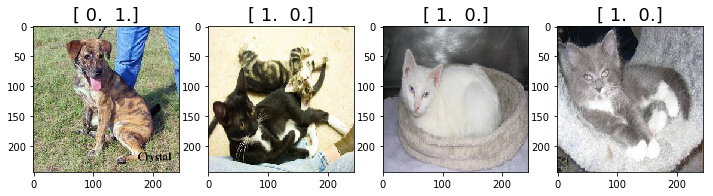

In [48]:
batches = get_batches('train', batch_size = batch_size)
val_batches = get_batches('valid', batch_size=batch_size)
imgs,labels = next(batches)

plots(imgs, titles= labels)

In [49]:
def pred_batch(imgs):
    preds= model.predict(imgs)
    idxs =np.argmax(preds, axis =1)
    
    print('Shape: {}'.format(preds.shape))
    print('First 5 classes: {}'.format(classes[:5]))
    print('First 5 Probabilities:{} \n'.format(preds[0,:5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('   {:.4f}/{}'.format(preds[i,idx], classes[idx]))

In [50]:
pred_batch(imgs)

Shape: (4, 1000)
First 5 classes: [u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']
First 5 Probabilities:[  2.5567e-06   6.7868e-07   2.1306e-07   1.7753e-06   2.2031e-06] 

Predictions prob/class: 
   0.1997/Chesapeake_Bay_retriever
   0.3275/tabby
   0.1396/Egyptian_cat
   0.2504/lynx
